## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.404398 -0.269294 -0.671146  1.316144 -0.970017  1.097908
1  1.745799  0.458942 -0.500032  1.146665 -1.248305  0.967604
2  1.013769 -1.578499  0.039723 -1.321727  0.721431 -1.778978
3 -1.232014 -0.322426 -1.174048 -0.213358  1.103408 -0.305288
4  0.657515 -1.077932  0.686146  0.161182  0.496376 -0.304425


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9504593	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9415692	total: 58.1ms	remaining: 29s
2:	learn: 0.9323788	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9232772	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9157224	total: 60.2ms	remaining: 12s
5:	learn: 0.9058838	total: 60.7ms	remaining: 10.1s
6:	learn: 0.8971128	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8886486	total: 61.8ms	remaining: 7.66s
8:	learn: 0.8802445	total: 62.3ms	remaining: 6.86s
9:	learn: 0.8715925	total: 62.8ms	remaining: 6.21s
10:	learn: 0.8617914	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8532029	total: 63.7ms	remaining: 5.24s
12:	learn: 0.8444904	total: 64.2ms	remaining: 4.87s
13:	learn: 0.8352812	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8288691	total: 65.4ms	remaining: 4.29s
15:	learn: 0.8207271	total: 65.8ms	remaining: 4.04s
16:	learn: 0.8136587	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8064476	total: 66.8ms	remaining: 3.64s
18:	learn: 0.7993944	total: 67.3ms	remaining: 3.4

92:	learn: 0.4241450	total: 106ms	remaining: 1.03s
93:	learn: 0.4211440	total: 106ms	remaining: 1.02s
94:	learn: 0.4180383	total: 107ms	remaining: 1.01s
95:	learn: 0.4148933	total: 107ms	remaining: 1.01s
96:	learn: 0.4113385	total: 108ms	remaining: 1s
97:	learn: 0.4084325	total: 108ms	remaining: 995ms
98:	learn: 0.4052148	total: 109ms	remaining: 988ms
99:	learn: 0.4019706	total: 109ms	remaining: 980ms
100:	learn: 0.3995529	total: 109ms	remaining: 973ms
101:	learn: 0.3960874	total: 110ms	remaining: 966ms
102:	learn: 0.3930972	total: 110ms	remaining: 961ms
103:	learn: 0.3897772	total: 111ms	remaining: 955ms
104:	learn: 0.3870293	total: 111ms	remaining: 948ms
105:	learn: 0.3839712	total: 112ms	remaining: 942ms
106:	learn: 0.3808748	total: 112ms	remaining: 935ms
107:	learn: 0.3781911	total: 112ms	remaining: 929ms
108:	learn: 0.3753330	total: 113ms	remaining: 923ms
109:	learn: 0.3730433	total: 114ms	remaining: 918ms
110:	learn: 0.3708550	total: 114ms	remaining: 912ms
111:	learn: 0.3679433	t

258:	learn: 0.1236617	total: 186ms	remaining: 533ms
259:	learn: 0.1228468	total: 187ms	remaining: 531ms
260:	learn: 0.1218080	total: 187ms	remaining: 530ms
261:	learn: 0.1210617	total: 188ms	remaining: 528ms
262:	learn: 0.1202458	total: 188ms	remaining: 527ms
263:	learn: 0.1194295	total: 188ms	remaining: 525ms
264:	learn: 0.1186178	total: 189ms	remaining: 524ms
265:	learn: 0.1176785	total: 189ms	remaining: 522ms
266:	learn: 0.1167083	total: 190ms	remaining: 521ms
267:	learn: 0.1157852	total: 190ms	remaining: 520ms
268:	learn: 0.1150033	total: 191ms	remaining: 519ms
269:	learn: 0.1141099	total: 191ms	remaining: 517ms
270:	learn: 0.1132599	total: 192ms	remaining: 516ms
271:	learn: 0.1124004	total: 192ms	remaining: 515ms
272:	learn: 0.1114145	total: 193ms	remaining: 513ms
273:	learn: 0.1105835	total: 193ms	remaining: 512ms
274:	learn: 0.1097222	total: 194ms	remaining: 511ms
275:	learn: 0.1088959	total: 195ms	remaining: 510ms
276:	learn: 0.1080830	total: 195ms	remaining: 509ms
277:	learn: 

465:	learn: 0.0319146	total: 287ms	remaining: 329ms
466:	learn: 0.0317219	total: 288ms	remaining: 329ms
467:	learn: 0.0315733	total: 288ms	remaining: 328ms
468:	learn: 0.0314096	total: 289ms	remaining: 327ms
469:	learn: 0.0311792	total: 290ms	remaining: 327ms
470:	learn: 0.0310355	total: 290ms	remaining: 326ms
471:	learn: 0.0308351	total: 291ms	remaining: 325ms
472:	learn: 0.0306948	total: 291ms	remaining: 325ms
473:	learn: 0.0305377	total: 292ms	remaining: 324ms
474:	learn: 0.0303579	total: 292ms	remaining: 323ms
475:	learn: 0.0301387	total: 293ms	remaining: 322ms
476:	learn: 0.0300042	total: 293ms	remaining: 322ms
477:	learn: 0.0298328	total: 294ms	remaining: 321ms
478:	learn: 0.0296100	total: 294ms	remaining: 320ms
479:	learn: 0.0294611	total: 294ms	remaining: 319ms
480:	learn: 0.0292870	total: 295ms	remaining: 318ms
481:	learn: 0.0290949	total: 295ms	remaining: 317ms
482:	learn: 0.0289317	total: 296ms	remaining: 317ms
483:	learn: 0.0287502	total: 296ms	remaining: 316ms
484:	learn: 

630:	learn: 0.0154577	total: 368ms	remaining: 215ms
631:	learn: 0.0153851	total: 368ms	remaining: 215ms
632:	learn: 0.0153698	total: 369ms	remaining: 214ms
633:	learn: 0.0152987	total: 369ms	remaining: 213ms
634:	learn: 0.0152797	total: 370ms	remaining: 213ms
635:	learn: 0.0152649	total: 370ms	remaining: 212ms
636:	learn: 0.0151815	total: 370ms	remaining: 211ms
637:	learn: 0.0151253	total: 371ms	remaining: 210ms
638:	learn: 0.0151108	total: 371ms	remaining: 210ms
639:	learn: 0.0150537	total: 372ms	remaining: 209ms
640:	learn: 0.0150355	total: 372ms	remaining: 208ms
641:	learn: 0.0150082	total: 373ms	remaining: 208ms
642:	learn: 0.0149904	total: 373ms	remaining: 207ms
643:	learn: 0.0149501	total: 374ms	remaining: 207ms
644:	learn: 0.0148500	total: 374ms	remaining: 206ms
645:	learn: 0.0147617	total: 375ms	remaining: 205ms
646:	learn: 0.0147223	total: 375ms	remaining: 205ms
647:	learn: 0.0146262	total: 375ms	remaining: 204ms
648:	learn: 0.0145412	total: 376ms	remaining: 203ms
649:	learn: 

847:	learn: 0.0073923	total: 470ms	remaining: 84.3ms
848:	learn: 0.0073643	total: 471ms	remaining: 83.7ms
849:	learn: 0.0073380	total: 471ms	remaining: 83.2ms
850:	learn: 0.0073075	total: 472ms	remaining: 82.6ms
851:	learn: 0.0072746	total: 472ms	remaining: 82ms
852:	learn: 0.0072371	total: 473ms	remaining: 81.5ms
853:	learn: 0.0072302	total: 473ms	remaining: 80.9ms
854:	learn: 0.0072234	total: 473ms	remaining: 80.3ms
855:	learn: 0.0071948	total: 474ms	remaining: 79.7ms
856:	learn: 0.0071652	total: 474ms	remaining: 79.2ms
857:	learn: 0.0071586	total: 475ms	remaining: 78.6ms
858:	learn: 0.0071434	total: 475ms	remaining: 78ms
859:	learn: 0.0071145	total: 476ms	remaining: 77.5ms
860:	learn: 0.0070766	total: 476ms	remaining: 76.9ms
861:	learn: 0.0070422	total: 477ms	remaining: 76.3ms
862:	learn: 0.0070274	total: 477ms	remaining: 75.8ms
863:	learn: 0.0069995	total: 478ms	remaining: 75.2ms
864:	learn: 0.0069851	total: 478ms	remaining: 74.6ms
865:	learn: 0.0069527	total: 479ms	remaining: 74.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

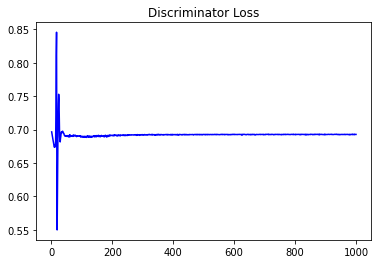

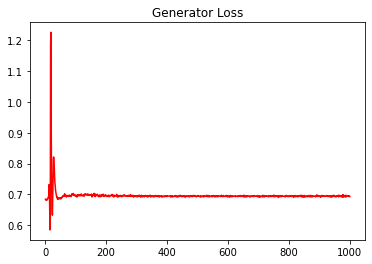

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13572216047150432


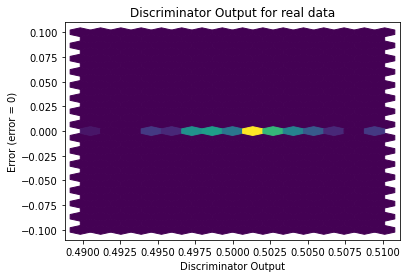

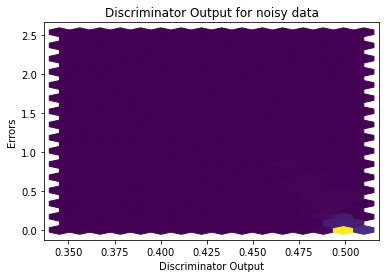

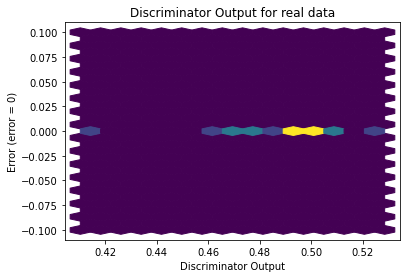

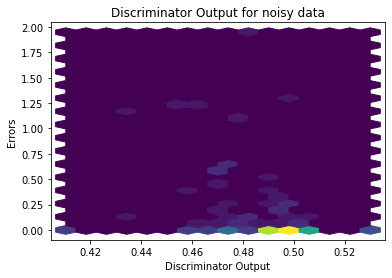

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


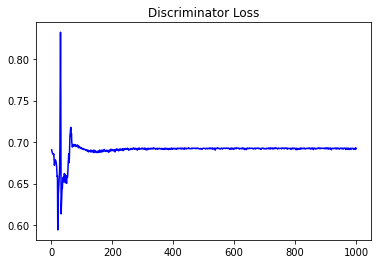

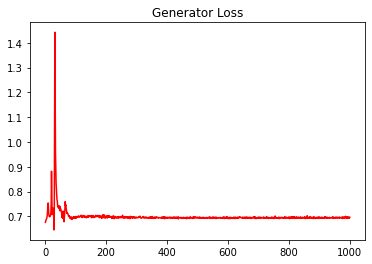

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12336023290087599


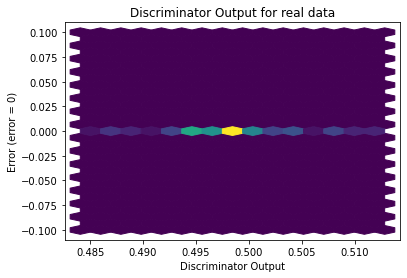

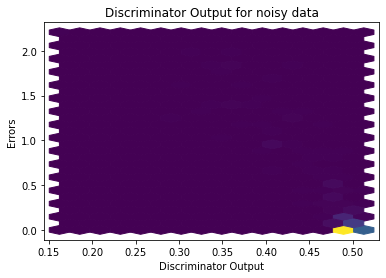

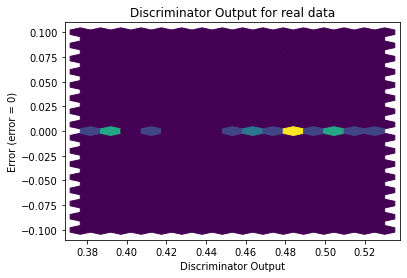

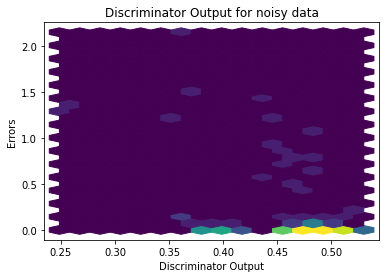

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8815]], requires_grad=True)
